<a href="https://colab.research.google.com/github/Gurubux/Data-Lit/blob/master/airlines_least_delay_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns

import plotly.plotly as py
import plotly.graph_objs as go

In [38]:
flights = pd.read_csv('https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/univariate_dist/data/flights.csv')
airlines = pd.read_csv('https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/univariate_dist/data/airlines.csv')
flights.head(10)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
5,6,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00
6,7,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,2013-01-01 06:00:00
7,8,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,2013-01-01 06:00:00
8,9,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01 06:00:00
9,10,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00


In [39]:
# MERGE COLUMNS OF DIFFERENT FILES
flights = flights.merge(airlines, how = 'left', on = 'carrier')
flights = flights[['arr_delay','carrier','name']] 
flights.head(10)

,arr_delay,carrier,name
0,11.0,UA,United Air Lines Inc.
1,20.0,UA,United Air Lines Inc.
2,33.0,AA,American Airlines Inc.
3,-18.0,B6,JetBlue Airways
4,-25.0,DL,Delta Air Lines Inc.
5,12.0,UA,United Air Lines Inc.
6,19.0,B6,JetBlue Airways
7,-14.0,EV,ExpressJet Airlines Inc.
8,-8.0,B6,JetBlue Airways
9,8.0,AA,American Airlines Inc.


In [0]:
# FILTER FLIGHT DELAYS BETWEEN -60 AND 120 MINUTES = formated_flights.csv
flights = flights[flights['arr_delay'].between(-60, 120)]

In [41]:
#print(flights.shape)
#print(flights['carrier'].unique())

carriers = flights['carrier'].unique()
#print(type(carriers))
print(len(flights['carrier'].unique()))
flights['arr_delay'].describe()

16


count    317113.000000
mean          1.297143
std          29.064401
min         -60.000000
25%         -17.000000
50%          -6.000000
75%          11.000000
max         120.000000
Name: arr_delay, dtype: float64

In [0]:
carriers_arr_delay_total_mean={}
carriers_arr_delay_positive_mean={}
for x in carriers:
  carrier_i = flights[(flights.carrier == x) & (flights.arr_delay >=0)]
  carriers_arr_delay_positive_mean[x]=carrier_i['arr_delay'].mean()
  #print(x,'\n',carrier_i['arr_delay'].describe())

In [0]:
for x in carriers:
  carrier_j = flights[(flights.carrier == x)]
  carriers_arr_delay_total_mean[x]=carrier_j['arr_delay'].mean()
  #print(x,'\n',carrier_j[carrier_[x]=='AS']['arr_delay'].describe())
#flights[(flights.carrier == 'AS')]['arr_delay'].describe()

In [0]:
#carriers_arr_delay_total_mean

In [0]:
#carriers_arr_delay_positive_mean

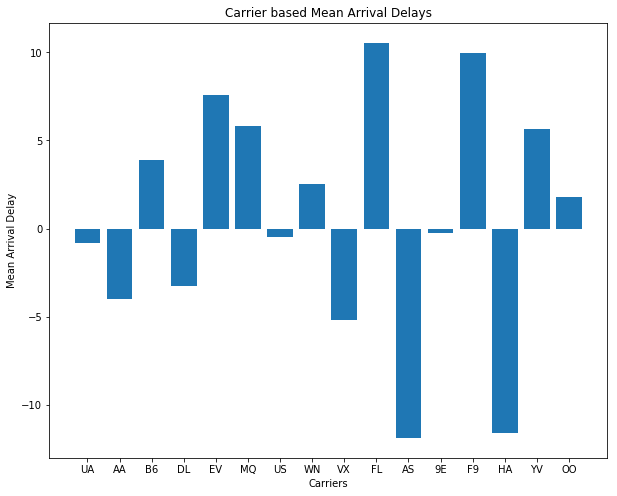

In [46]:
plt.bar(range(len(carriers_arr_delay_total_mean)), list(carriers_arr_delay_total_mean.values()), align='center')
plt.xticks(range(len(carriers_arr_delay_total_mean)), list(carriers_arr_delay_total_mean.keys()))
plt.title('Carrier based Mean Arrival Delays')
plt.xlabel('Carriers')
plt.ylabel('Mean Arrival Delay')
plt.show()

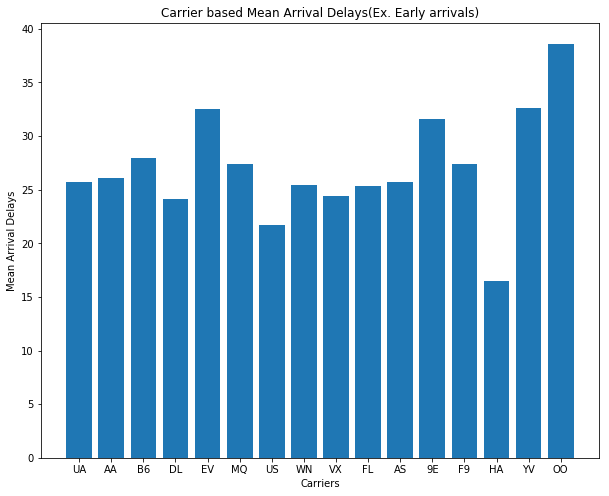

In [47]:
plt.bar(range(len(carriers_arr_delay_positive_mean)), list(carriers_arr_delay_positive_mean.values()), align='center')
plt.xticks(range(len(carriers_arr_delay_positive_mean)), list(carriers_arr_delay_positive_mean.keys()))
plt.title('Carrier based Mean Arrival Delays(Ex. Early arrivals)')
plt.xlabel('Carriers')
plt.ylabel('Mean Arrival Delays')
plt.show()

In [0]:
carriers_arr_delay_mean_of_pos_tot={}
for carrier in carriers_arr_delay_total_mean: 
    carriers_arr_delay_mean_of_pos_tot[carrier]=(carriers_arr_delay_total_mean[carrier]+carriers_arr_delay_positive_mean[carrier]) / 2
#carriers_arr_delay_mean_of_pos_tot

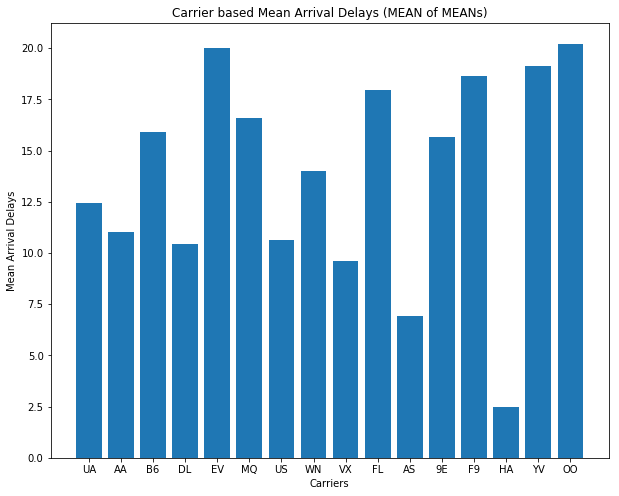

In [49]:
plt.bar(range(len(carriers_arr_delay_mean_of_pos_tot)), list(carriers_arr_delay_mean_of_pos_tot.values()), align='center')
plt.xticks(range(len(carriers_arr_delay_mean_of_pos_tot)), list(carriers_arr_delay_mean_of_pos_tot.keys()))
plt.title('Carrier based Mean Arrival Delays (MEAN of MEANs)')
plt.xlabel('Carriers')
plt.ylabel('Mean Arrival Delays')
plt.show()


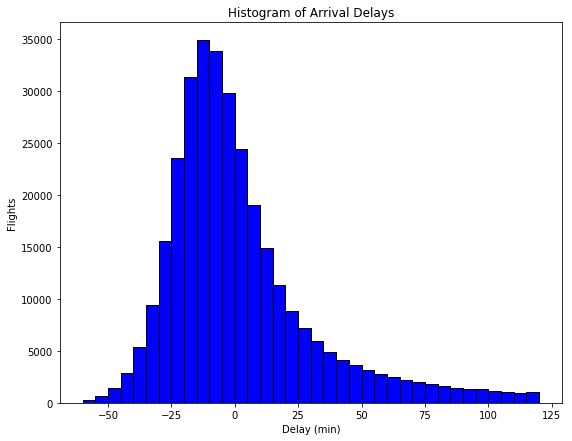

In [50]:
figsize(9, 7)

# Make the histogram using matplotlib, bins must be integet
plt.hist(flights['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)'); plt.ylabel('Flights');

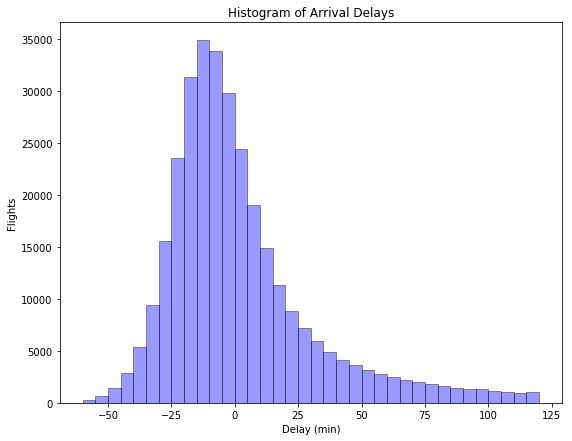

In [51]:
figsize(9, 7)

sns.distplot(flights['arr_delay'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)'); plt.ylabel('Flights');

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
#configure_plotly_browser_state()
  
#data = [go.Histogram(x=flights['arr_delay'])]

#py.iplot(data, filename='basic histogram')

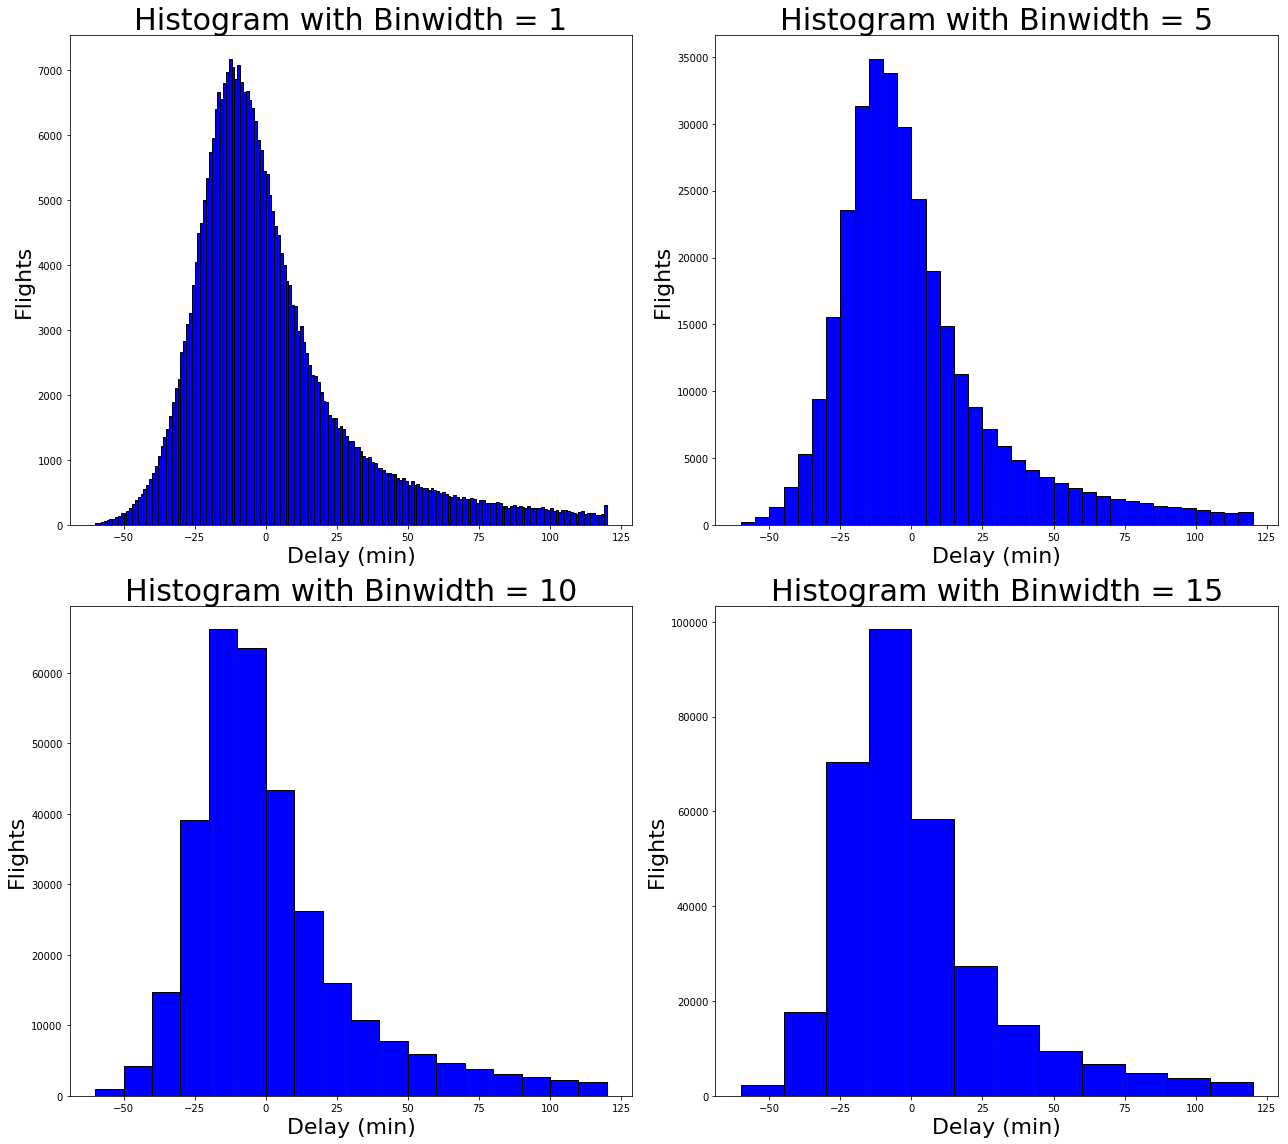

In [54]:
# Histogram with Varying Binwidths
figsize(18, 16)

# Show 4 different binwidths
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(flights['arr_delay'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 30)
    ax.set_xlabel('Delay (min)', size = 22)
    ax.set_ylabel('Flights', size= 22)

plt.tight_layout()
plt.show()

In [0]:
# Extract top five airlines with most flights
carrier_flights = pd.Series(flights.groupby('name')['name'].count())
#print(carrier_flights)
carrier_flights = carrier_flights.sort_values(ascending=False)
#print(carrier_flights)
top_five = carrier_flights.index[:5]
#print(top_five)

# Subset to the top 5 airlines
top_five_flights = flights[flights['name'].isin(top_five)]
#top_five_flights

# Where Histograms Fail: Multiple Categories

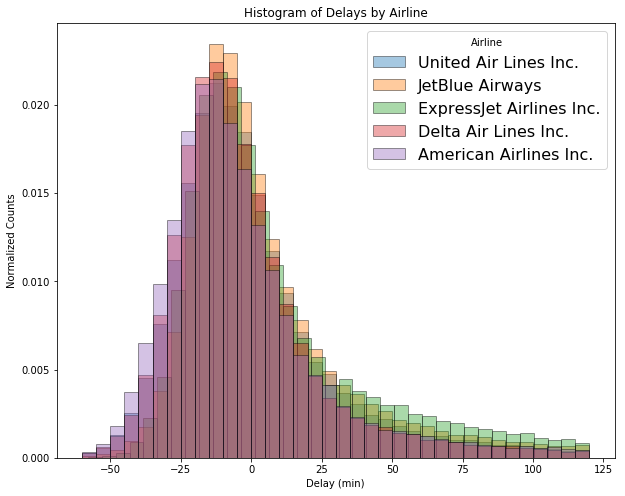

In [56]:
figsize(10, 8)

# Iterate through each of the five airlines
for airline in top_five:
    # Subset to the airline
    subset = top_five_flights[top_five_flights['name'] == airline]
    # Make a histogram with the airline
    sns.distplot(subset['arr_delay'], bins = int(180/5), 
                 label = airline, hist = True, kde = False, 
                 norm_hist=True, 
                 hist_kws = {'edgecolor': 'black'})
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Histogram of Delays by Airline'); plt.xlabel('Delay (min)'); plt.ylabel('Normalized Counts');

In [0]:
x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
x2 = list(flights[flights['name'] == 'JetBlue Airways']['arr_delay'])
x3 = list(flights[flights['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(flights[flights['name'] == 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(flights[flights['name'] == 'American Airlines Inc.']['arr_delay'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# SIDE-BY-SIDE HISTOGRAMS

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



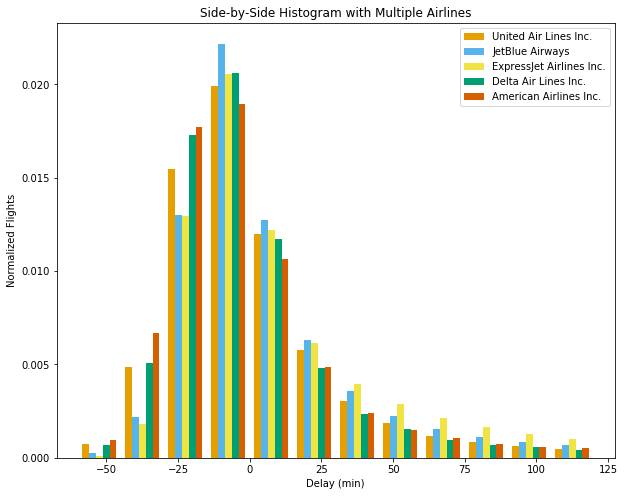

In [58]:
figsize(10, 8)

# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines');

# STACKED HISTOGRAMS

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



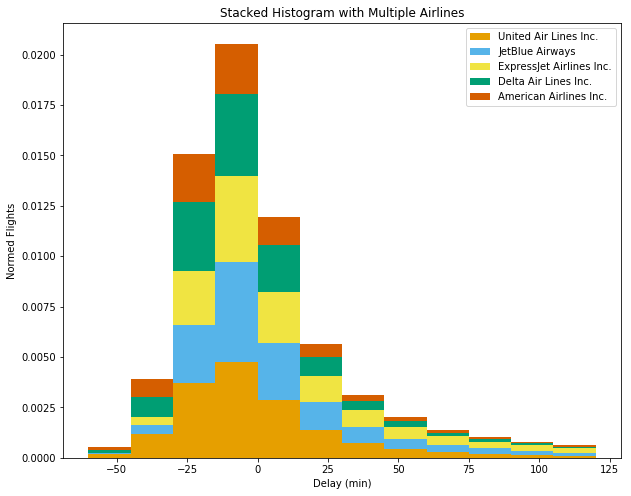

In [59]:
figsize(10, 8)
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True,
         stacked=True,
         color = colors, label=names)

plt.legend(); plt.xlabel('Delay (min)'); plt.ylabel('Normed Flights');
plt.title('Stacked Histogram with Multiple Airlines');

#Solution 3: Density Plots
## Density Plot of All Delays Using Seaborn

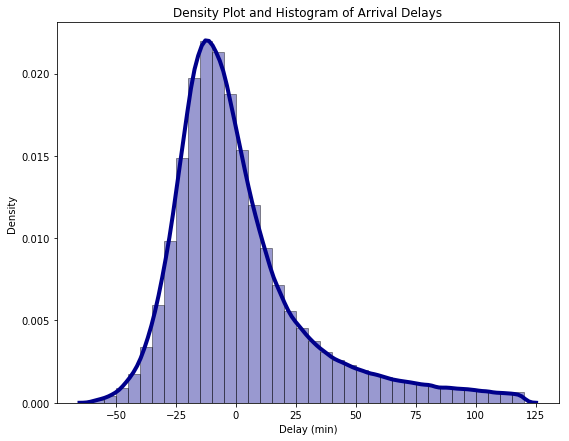

In [60]:
figsize(9, 7)

sns.distplot(flights['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

plt.title('Density Plot and Histogram of Arrival Delays'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

## Density Plot with Varying Bandwidths

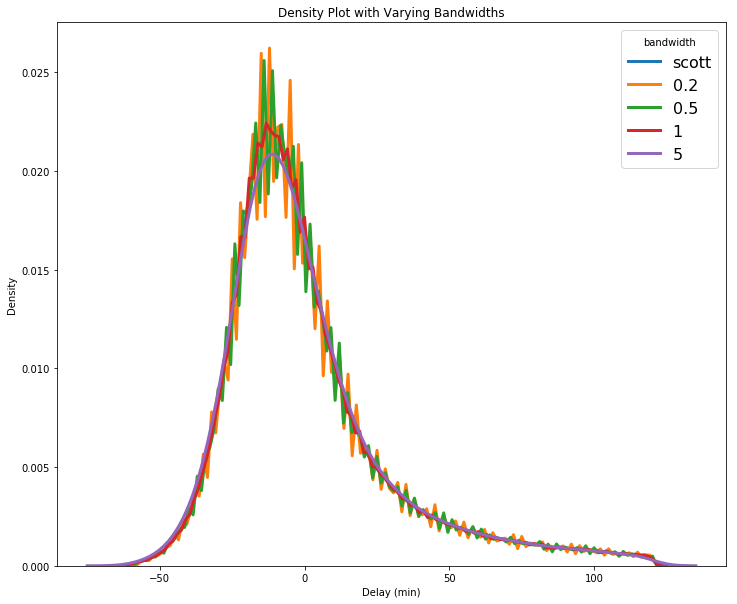

In [61]:
figsize(12, 10)

for bandwidth in ['scott', 0.2, 0.5, 1, 5]:
    sns.distplot(flights['arr_delay'], hist = False, kde = True, 
                 kde_kws={'bw': bandwidth, 'linewidth': 3},
                 label = bandwidth)
    
plt.legend(prop={'size': 16}, title = 'bandwidth')
plt.title('Density Plot with Varying Bandwidths'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

## Different Kernels for the Density Plot

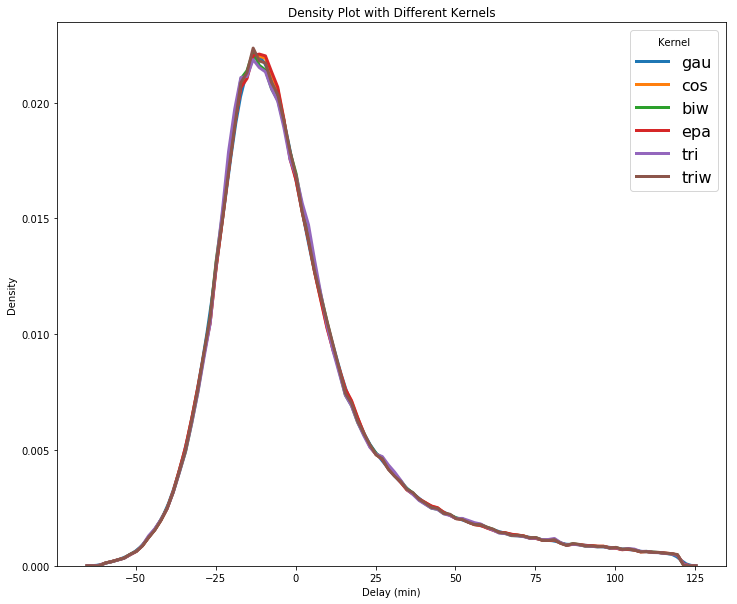

In [62]:
for kernel in ['gau', 'cos', 'biw', 'epa', 'tri', 'triw']:
    sns.distplot(flights['arr_delay'], hist = False, kde = True, 
                 kde_kws={'kernel': kernel, 'linewidth': 3},
                 label = kernel)
    
plt.legend(prop={'size': 16}, title = 'Kernel')
plt.title('Density Plot with Different Kernels'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

# Density Plot of Delays of Top Five

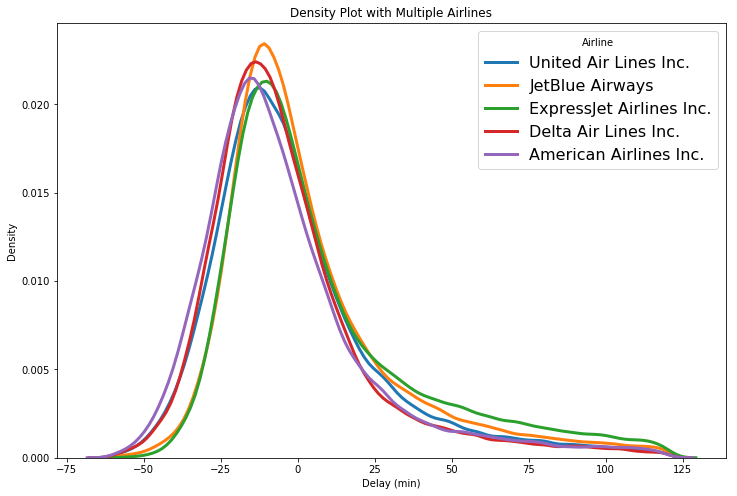

In [63]:
figsize(12, 8)

# List of five airlines to plot
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# Iterate through the top five airlines
for airline in airlines:
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines'); 
plt.xlabel('Delay (min)')
plt.ylabel('Density');

## Shaded Density Plot

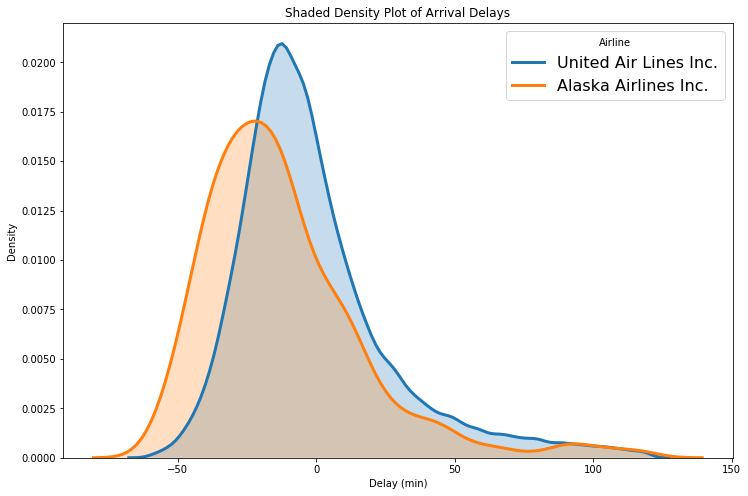

In [64]:
for airline in ['United Air Lines Inc.', 'Alaska Airlines Inc.']:
    subset = flights[flights['name'] == airline]
    
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = airline)
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Shaded Density Plot of Arrival Delays'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

## Density with Rug Plot

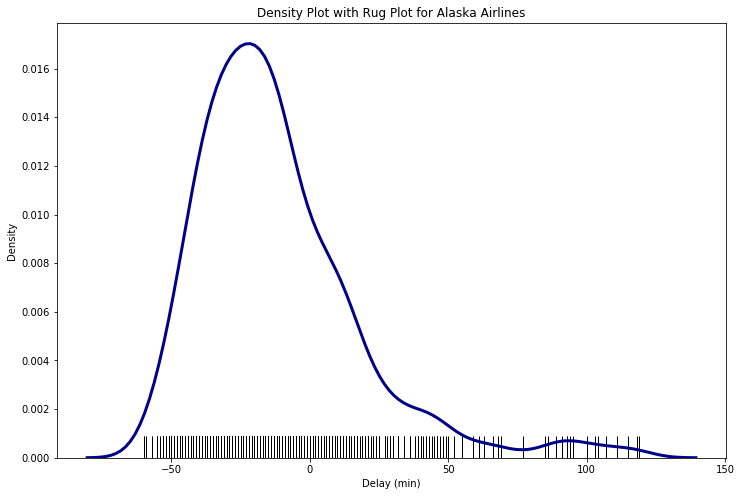

In [65]:
# Subset to Alaska Airlines
subset = flights[flights['name'] == 'Alaska Airlines Inc.']

# Density Plot with Rug Plot
sns.distplot(subset['arr_delay'], hist = False, kde = True, rug = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})

# Plot formatting
plt.title('Density Plot with Rug Plot for Alaska Airlines');
plt.xlabel('Delay (min)'); plt.ylabel('Density');